In [2]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
batch_size = 1

In [4]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor()), batch_size=batch_size, shuffle=True)

In [5]:
for d, t in train_loader:
    print(d, t)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
test_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train=False, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()), 
                                                       batch_size=batch_size, shuffle=True)

In [88]:
device = torch.device("cuda")
torch.cuda.init()

In [89]:
def oneHot(target):
    onehot = torch.zeros(10, device=device)
    onehot[target] = 1
    return onehot

In [94]:
BCE = torch.nn.BCELoss()
Sigmoid = torch.nn.Sigmoid()

In [103]:
w1 = torch.randn(10, 784, requires_grad=True, device=device)
b1 = torch.randn(10, requires_grad=True, device=device)

w2 = torch.randn(10, 10, requires_grad=True, device=device)
b2 = torch.randn(10, requires_grad=True, device=device)


learning_rate = 0.0001
optimizator = torch.optim.Adam([w1, b1, w2, b2], lr=learning_rate)

In [104]:
for _ in range(100):
    tot_loss = 0
    for data, target in train_loader:
        x = data.reshape(784).cuda()
        y = oneHot(target)

        a1_ = Sigmoid(torch.mv(w1,x)+b1)
        a2_ = Sigmoid(torch.mv(w2,a1_)+b2)
        
        loss = BCE(a2_, y)
        
        optimizator.zero_grad()
        loss.backward()
        optimizator.step()
        tot_loss += loss
    tot_loss = tot_loss / 60000
    print(tot_loss)

tensor(0.3117, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1961, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1488, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1242, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1089, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0989, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0922, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0874, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0838, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0809, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0785, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0765, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0747, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0733, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0719, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0707, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0696, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0687, device='cuda:0', grad_fn=<DivBack

In [105]:
cnt = 0
for data, target in test_loader:
    x = data.reshape(784).cuda()
    
    a1_ = Sigmoid(torch.mv(w1,x)+b1)
    a2_ = Sigmoid(torch.mv(w2,a1_)+b2)

    y_ = a2_.to(torch.device("cpu")).argmax()
    
    if y_ == target:
        cnt += 1
cnt/10000

0.9216

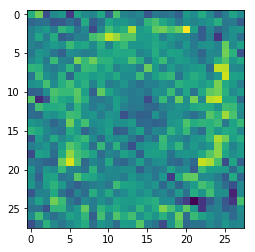

In [106]:
plt.imshow(w1.cpu()[1].detach().numpy().reshape(28, 28))